# Изучение закономерностей, определяющих успешность игр

Из открытых источников доступны исторические данные о продаже игр, оценках пользователей и экспертов, жанрах и платформах (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности, чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Представлены данные до 2016 года. Надо спланировать кампанию на 2017-й. 

***Описание проекта***
Для интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры, изучить закономерности, определяющие успешность игр. Дааные брать из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

***Цели проекта***
- Выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
- Представлены данные до 2016 года. Надо спланировать кампанию на 2017-й. 


In [46]:
#импортируем библиотеки
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import warnings
warnings.filterwarnings("ignore") #отключим уведомления на предупреждениях

## ***Общая информация***

In [47]:
data = pd.read_csv('games.csv')
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


## *** Подготовка данных***

Приведение столбцов к нижнему регистру для дальнейшего удобства

In [48]:
data.columns = data.columns.str.lower()

In [49]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Обработка пропусков и преобразование в нужные типы

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В полном DataFrame 16715 строк. Преобразование столбца year_of_release в целые числа. Столбец user_score в вещественный тип. Разберемся отдельно с каждым столбцом

***Столбец name***

In [51]:
data['name'].isna().sum()

2

In [52]:
data[data['name'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В этом столбце 2 пропуска. Эти строки нужно просто удалить, так как нет названия игры. Выше приведено, что в этих данных ничего важного нет.

In [53]:
 data = data.dropna(subset=['name']) 

In [54]:
data['name'].isna().sum() #проверка, что эти пропуски удалились

0

***Столбец year_of_release***

In [55]:
data['year_of_release'].isna().sum()

269

Пропуски связаны с человеческим фактором, что человек, заполнявший данные, либо не знал эту информацию, либо забыл запомнить

In [56]:
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

Заполним пропуски (-1), чтобы не влияло на целостную картину. В дальнейшем, если понадобится исследовать этот столбец, то мы не будем исползовать данное значение.

In [57]:
data['year_of_release'] = data['year_of_release'].fillna(-1)

In [58]:
data['year_of_release'].isna().sum() #проверка что заменили все значения

0

In [59]:
data['year_of_release'] = data['year_of_release'].astype('Int16') #меняем тип

***Столбец genre***

In [60]:
data['genre'].isna().sum()

0

В данном солбце нет пропусков

***Столбец critic_score***

In [61]:
data['critic_score'].isna().sum()

8576

В данном столбце много пропусков. Скорее всего к ним привел какой-то компьютерный сбой

In [62]:
data['critic_score'].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

Заполним пропуски (-1). Чтобы не искажать исследования.

In [63]:
data['critic_score'] = data['critic_score'].fillna(-1)

In [64]:
data['critic_score'].isna().sum() #проверка, что заменили все пропуски

0

***Столбец user_score***

In [65]:
data['user_score'].isna().sum()

6699

Такое количество пропусков скорее всего связано со сбоем данных.Сначала разберемся со значениями tbd. Расшифровка tbd: "To Be Determined" - Эти значения можно заменить на Nan

In [66]:
data.loc[(data.user_score == 'tbd'), 'user_score'] = np.NaN

In [67]:
data['user_score'].isna().sum() 

9123

Стало больше пропусков.

In [68]:
data['user_score'] = pd.to_numeric(data['user_score'])

In [69]:
data['user_score'].describe()

count    7590.000000
mean        7.125046
std         1.500006
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

Замена на (-1)

In [70]:
data['user_score'] = data['user_score'].fillna((-1))

***Столбец rating***

In [71]:
data['rating'].isna().sum()

6764

In [72]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [73]:
data['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

Заменим пропуски значением (-1), если в дальнйшем будем его исследовать, то будет исключать

In [74]:
data['rating'] = data['rating'].fillna('-')

In [75]:
data['rating'].value_counts()

-       6764
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

In [76]:
data['rating'].isna().sum()

0

Подсчет суммарных продаж во всех регионах

In [77]:
data['res_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,res_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,-,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,-,31.38


Закончилась предработка данных. Я удалила ненужные данные, которые в дальнейшем невозможно было бы использовать в исследовании. Также поменяла тип данных в некоторых столбцах, что соответствует их предназначению и чтобы в дальнейшем их можно было использовать. Также добавила столбец суммарных продаж, который поможет в дальнейшем исследовании.

## Исследовательский анализ данных

Количество выпустившихся игр в разные годы. Определение важного интервала годов

In [78]:
data[data['year_of_release'] != -1]['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: Int64

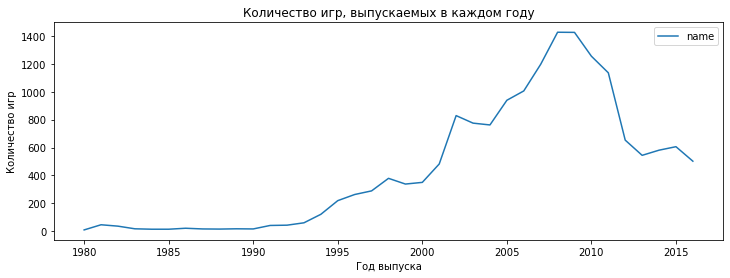

In [79]:
years = data[data['year_of_release'] > -1]
fig, ax = plt.subplots()
years.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(figsize=(12,4), ax = ax);
ax.set_xlabel('Год выпуска')
ax.set_ylabel('Количество игр')
plt.title('Количество игр, выпускаемых в каждом году');

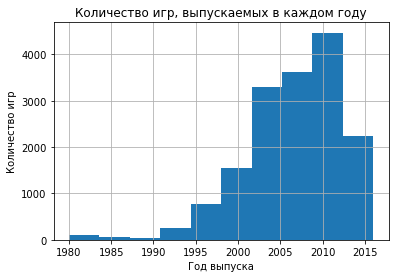

In [80]:
fig, ax = plt.subplots()
years['year_of_release'].hist(ax = ax);
ax.set_xlabel('Год выпуска')
ax.set_ylabel('Количество игр')
plt.title('Количество игр, выпускаемых в каждом году');

По графикам видно, что актуальный период с 2000 по 2016 год. До 2000 игр было мало, и их можно не рассматривать, так как они не повлияют на результаты исследования.

Платформа

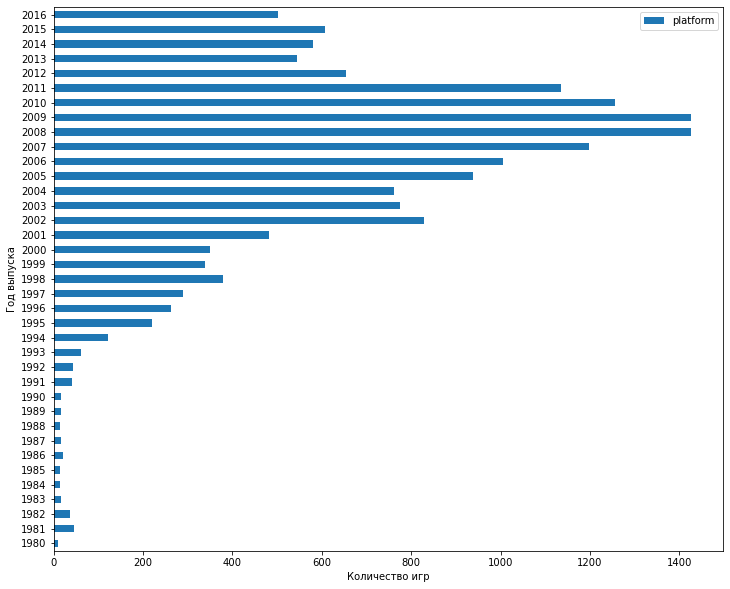

In [81]:
fig, ax = plt.subplots()
years.pivot_table(index = 'year_of_release',values='platform', aggfunc='count').plot(ax = ax,kind='barh', y ='platform',figsize=(12,10));
ax.set_xlabel('Количество игр')
ax.set_ylabel('Год выпуска');

Больше всего игр выпустилось в 2008 году

Продажи по платформам

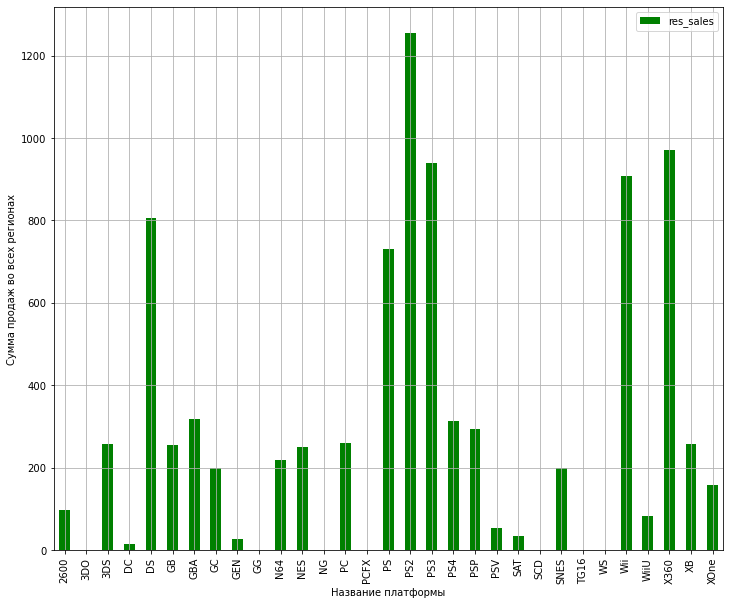

In [82]:
fig, ax = plt.subplots()
data.pivot_table(index='platform', values='res_sales', aggfunc='sum').plot(ax = ax, grid=True,kind='bar', color='g', figsize=(12, 10));
ax.set_xlabel('Название платформы')
ax.set_ylabel('Сумма продаж во всех регионах');

Самая популярная платформа PS2. Также популярными платформами являются DS, PS, PS3, Wii, X360

In [83]:
games = years.query('platform == "DS" or platform == "PS" or platform == "PS2" or platform == "PS3" or platform == "Wii" or platform == "X360"')
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,res_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16700,Mezase!! Tsuri Master DS,DS,2009,Sports,0.00,0.00,0.01,0.00,-1.0,-1.0,-,0.01
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.00,0.00,-1.0,-1.0,E,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,-1.0,-1.0,-,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,-,0.01


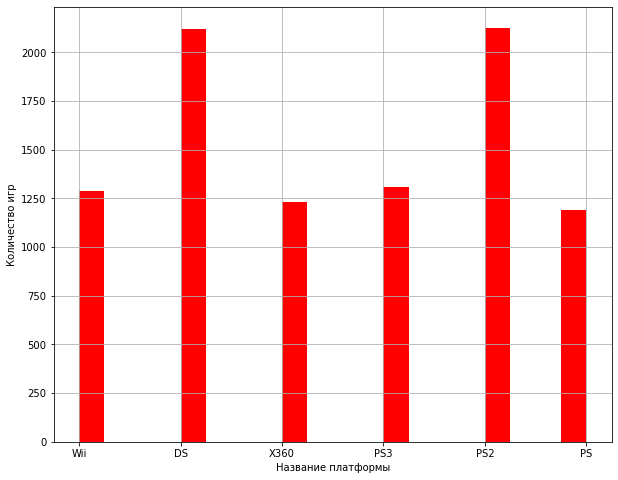

In [84]:
fig, ax = plt.subplots()
games['platform'].hist(ax = ax, bins=20, figsize=(10,8), color='r');
ax.set_xlabel('Название платформы')
ax.set_ylabel('Количество игр');

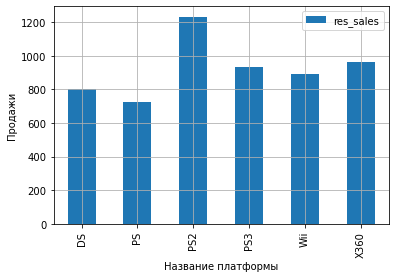

In [85]:
fig, ax = plt.subplots()
games.pivot_table(index='platform', values='res_sales', aggfunc='sum').plot(ax = ax,grid=True,kind='bar');
ax.set_xlabel('Название платформы')
ax.set_ylabel('Продажи');

Развитие каждой платформы 


Platform DS

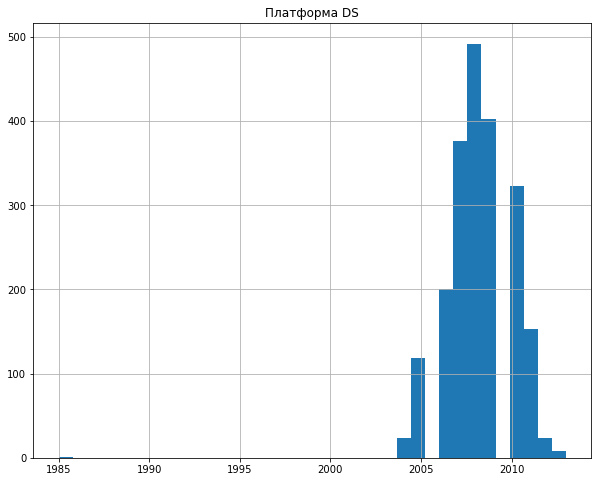

In [86]:
ds = games.query('platform=="DS"')
plt.title('Платформа DS')
ds['year_of_release'].hist(bins=36, figsize=(10,8));

Популярность начала расти где-то с 2003-2004 года, пик популярности был где-то 2007 год.

Platform PS

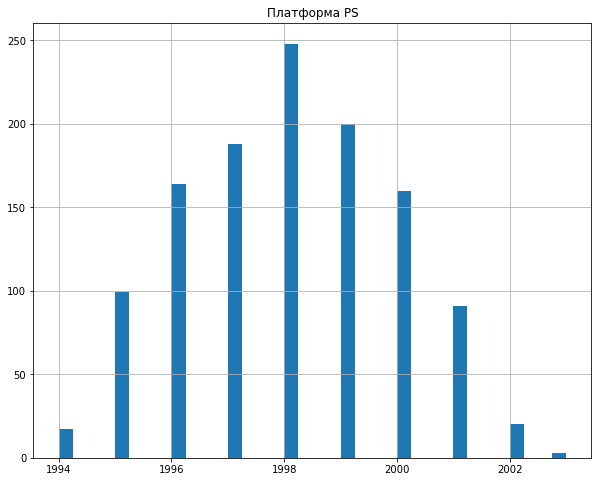

In [87]:
ps = games.query('platform=="PS"')
plt.title('Платформа PS')
ps['year_of_release'].hist(bins=36, figsize=(10,8));

Популярность начала расти постепенно с 1994 и по тихоньку растет. Пик популярности приходится на 1998 год. Дальше идёт медленный спуск

Platform PS2

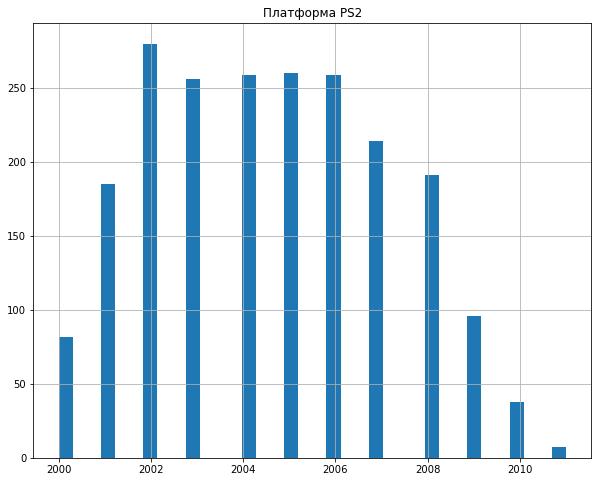

In [88]:
ps2 = games.query('platform=="PS2"')
plt.title('Платформа PS2')
ps2['year_of_release'].hist(figsize=(10,8),bins=36);

Популярность начала расти где-то с 2000-х годов, одинаковое количество популярности с 2002 по 2006 год. Потом началось потихоньку снижаться.

Platform PS3

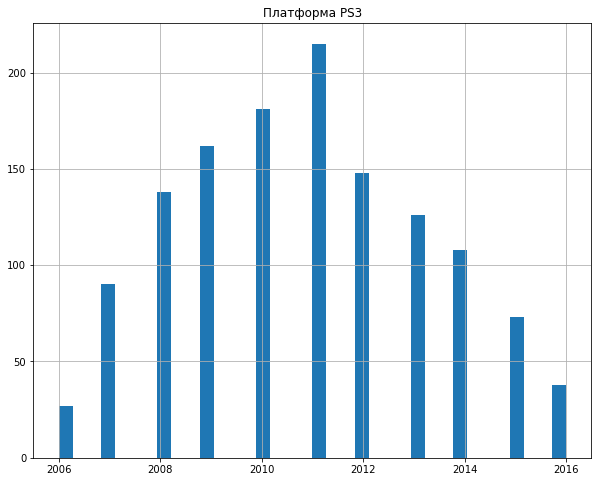

In [89]:
ps3 = games.query('platform=="PS3"')
plt.title('Платформа PS3')
ps3['year_of_release'].hist(bins=36, figsize=(10,8));

Пик популярности пришёлся на 2011 год. Начало было в 2006 году. После 2011 года пошел спуск.

Platform Wii

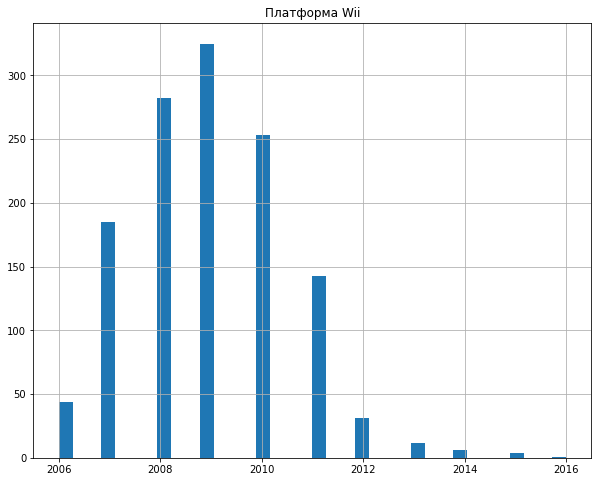

In [90]:
wii = games.query('platform=="Wii"')
plt.title('Платформа Wii')
wii['year_of_release'].hist(bins=36, figsize=(10,8));

Популярность пришлась на 2008 год.

Platform X360

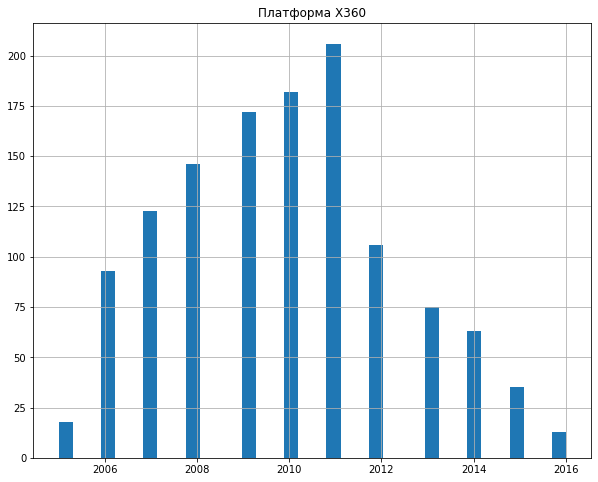

In [91]:
x360 = games.query('platform=="X360"')
plt.title('Платформа X360')
x360['year_of_release'].hist(bins=36, figsize=(10,8));

Пик популярности пришелся на 2011 год, потом был резкий спуск

В среднем платформы начали выходить в 2003-2005 году. Платформы исчезали до 2014. 

In [92]:
print('Xарактерный срок жизни крупных платформы DS -', max(ds['year_of_release']) - min(ds['year_of_release']), 'лет')
print('Xарактерный срок жизни крупных платформы PS -', max(ps['year_of_release']) - min(ps['year_of_release']), 'лет')
print('Xарактерный срок жизни крупных платформы PS2 -', max(ps2['year_of_release']) - min(ps2['year_of_release']), 'лет')
print('Xарактерный срок жизни крупных платформы PS3 -', max(ps3['year_of_release']) - min(ps3['year_of_release']), 'лет')
print('Xарактерный срок жизни крупных платформы Wii -', max(wii['year_of_release']) - min(wii['year_of_release']), 'лет')
print('Xарактерный срок жизни крупных платформы X360 -', max(x360['year_of_release']) - min(x360['year_of_release']), 'лет')

Xарактерный срок жизни крупных платформы DS - 28 лет
Xарактерный срок жизни крупных платформы PS - 9 лет
Xарактерный срок жизни крупных платформы PS2 - 11 лет
Xарактерный срок жизни крупных платформы PS3 - 10 лет
Xарактерный срок жизни крупных платформы Wii - 10 лет
Xарактерный срок жизни крупных платформы X360 - 11 лет


In [93]:
#возьмем данные за актуальный период(2014-2016 год)
years=years.loc[years['year_of_release'] >= 2014]

Рассмотрим платформы, которые лидруют по продажам за актуальный период

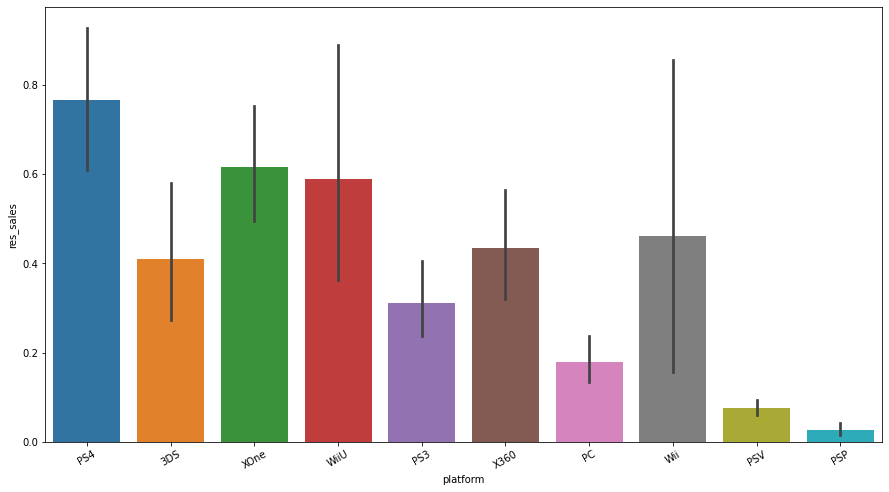

In [94]:
plt.figure(figsize = (15,8))
ax = sns.barplot(data=years, x='platform', y ='res_sales');
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30);

Лидирует по продажам приставка WiiU, Wii, X360, PS4, XOne. Самые маленькие продажи принесла приставка PSV, PSP. Нужно рассмотреть лидирующие приставки, конкретно растут ли по ним продажи или падают. Также возьму года с 2014 по 2016год. Так как эти данные помогут сделать прогноз на 2017.

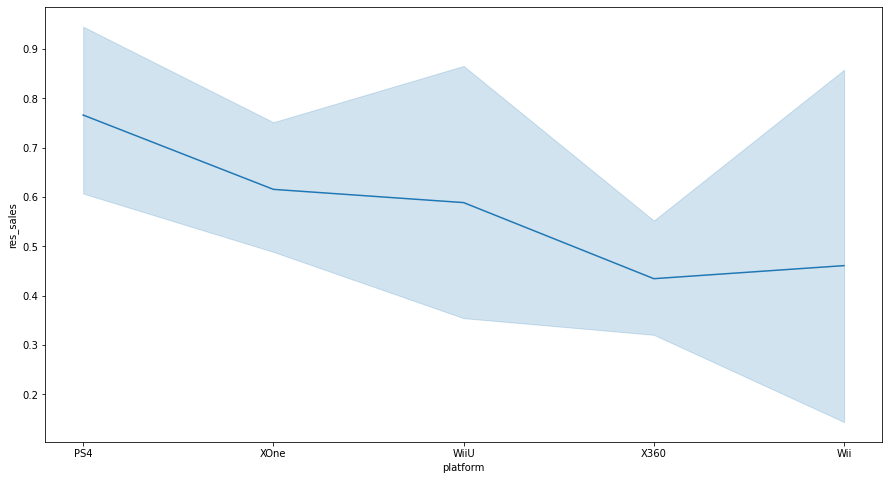

In [95]:
leaders = years.query('platform == "WiiU" or platform == "Wii" or platform == "PS4" or platform == "X360" or platform == "XOne"')
plt.figure(figsize = (15,8))
ax = sns.lineplot(data=leaders, x='platform', y ='res_sales');

<Figure size 1080x576 with 0 Axes>

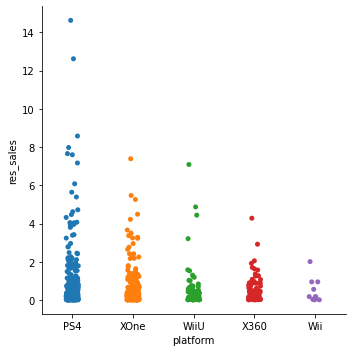

In [96]:
plt.figure(figsize = (15,8))
ax = sns.catplot(data=leaders, x='platform', y ='res_sales');

Можно сказать, что с каждым годом продажи уменьшались на каждой из платформ.

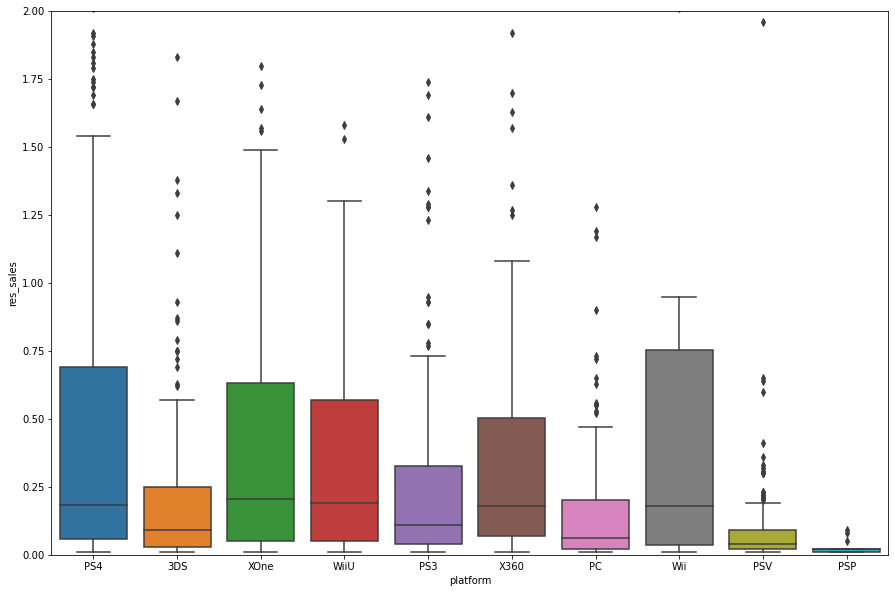

In [97]:
plt.figure(figsize=(15,10))
sns.boxplot(data=years, x='platform', y='res_sales').set(ylim=(0,2));

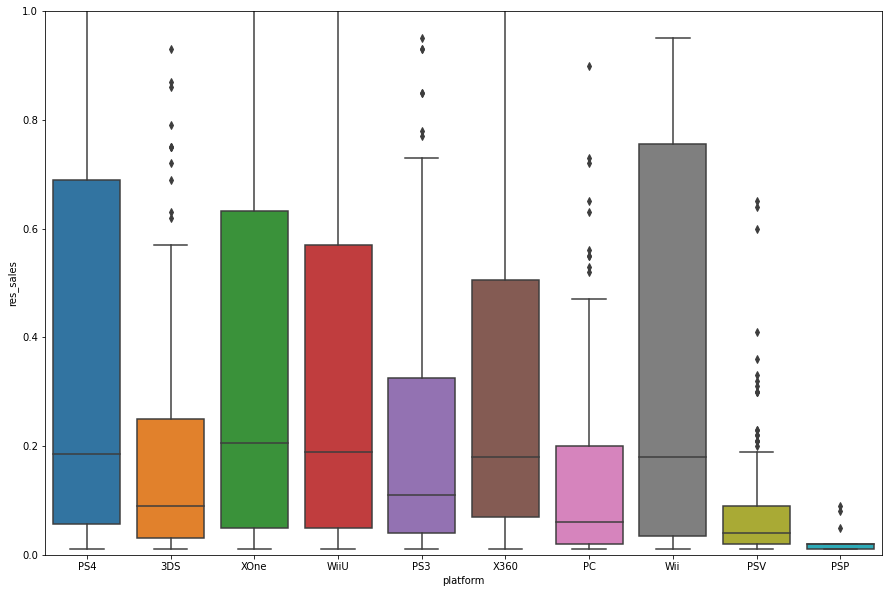

In [98]:
plt.figure(figsize=(15,10))
sns.boxplot(data=years, x='platform', y='res_sales').set(ylim=(0,1));

Лучше всех WiiU по медианному значению. Первый квартиль (25%) почти одинаков у всех платформ. IQR = (Q75-Q25). Минимум значений (1.5 *IQR) почти одинаков у всех платформ. Максимум значений (1.5*IQR) больше чем у других XOne, WiiU, PS4. Выше идут экстремальные точки. Максимум больше всего у XOne, потом у WiiU, PS4, X360. Меньше всего у платформы PSP, PSV.

In [99]:
years['platform'].value_counts()

PS4     376
PSV     295
XOne    228
PS3     219
3DS     212
PC      151
X360    111
WiiU     73
PSP      13
Wii      11
Name: platform, dtype: int64

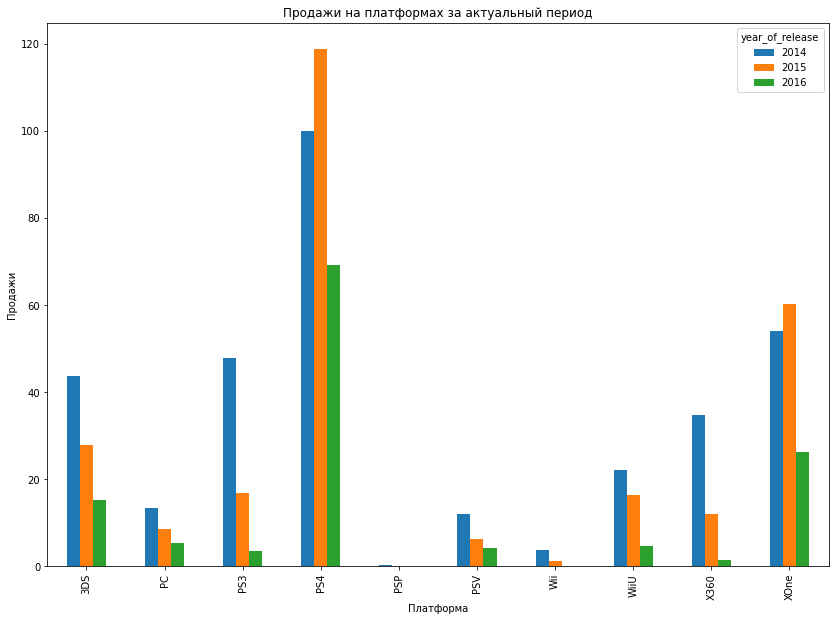

In [100]:
fig, ax = plt.subplots()
plt.title('Продажи на платформах за актуальный период')
years.pivot_table(index='platform', columns = 'year_of_release', values='res_sales', \
                  aggfunc='sum').plot(ax = ax,kind='bar', figsize=(14,10));
ax.set_xlabel('Платформа')
ax.set_ylabel('Продажи');

Маркетологам рекомендуется уделить внимание таким платформам,как PS4, XOne, PS3, 3DS, X360, WiiU, PC.

In [101]:
years_box = data[data['year_of_release'] > -1]

Рассмотрение платформы PS4

In [102]:
ps4 = years_box.query('platform == "PS4" and user_score > 0 and critic_score > 0')
ps4

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,res_sales
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17
...,...,...,...,...,...,...,...,...,...,...,...,...
16486,Super Dungeon Bros,PS4,2016,Action,0.01,0.00,0.00,0.00,42.0,2.3,E10+,0.01
16499,Sherlock Holmes: The Devil's Daughter,PS4,2016,Adventure,0.01,0.00,0.00,0.00,70.0,6.8,T,0.01
16500,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,-,0.01
16526,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01


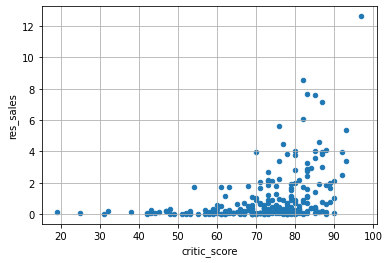

In [103]:
ps4.plot(x = 'critic_score', y='res_sales', kind='scatter', grid=True);

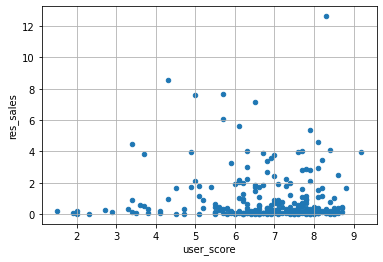

In [104]:
ps4.plot(x = 'user_score', y='res_sales', kind='scatter', grid=True);

In [105]:
ps4.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,res_sales
year_of_release,1.000000,-0.261760,-0.191355,-0.122830,-0.232177,-0.019983,0.150315,-0.234400
na_sales,-0.261760,1.000000,0.714988,0.530480,0.915292,0.414241,-0.022577,0.893807
eu_sales,-0.191355,0.714988,1.000000,0.519826,0.935136,0.346044,-0.050671,0.951656
jp_sales,-0.122830,0.530480,0.519826,1.000000,0.566734,0.322057,0.174512,0.592214
other_sales,-0.232177,0.915292,0.935136,0.566734,1.000000,0.408465,-0.037332,0.997798
critic_score,-0.019983,0.414241,0.346044,0.322057,0.408465,1.000000,0.557654,0.405895
user_score,0.150315,-0.022577,-0.050671,0.174512,-0.037332,0.557654,1.000000,-0.033625
res_sales,-0.234400,0.893807,0.951656,0.592214,0.997798,0.405895,-0.033625,1.000000


Зависимость между отзывами пользователей и продажами слабая, её почти нет. Зависимость между отзывами критиков и продажами умеренная, она есть.

Рассмотрим платформу PS3

In [106]:
ps3 = years_box.query('platform == "PS3" and user_score > 0 and critic_score > 0')
ps3

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,res_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
37,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M,13.33
41,Call of Duty: Black Ops,PS3,2010,Shooter,5.99,4.37,0.48,1.79,88.0,6.4,M,12.63
54,Gran Turismo 5,PS3,2010,Racing,2.96,4.82,0.81,2.11,84.0,7.5,E,10.70
...,...,...,...,...,...,...,...,...,...,...,...,...
15567,Tom Clancy's Splinter Cell Classic Trilogy HD,PS3,2011,Action,0.02,0.00,0.00,0.00,67.0,6.8,M,0.02
15649,Darksiders,PS3,2010,Action,0.01,0.00,0.00,0.00,82.0,7.9,M,0.01
15742,Invizimals: The Lost Kingdom,PS3,2013,Action,0.00,0.02,0.00,0.00,50.0,5.0,E10+,0.02
16146,Don Bradman Cricket 14,PS3,2014,Sports,0.00,0.01,0.00,0.00,73.0,6.9,E,0.01


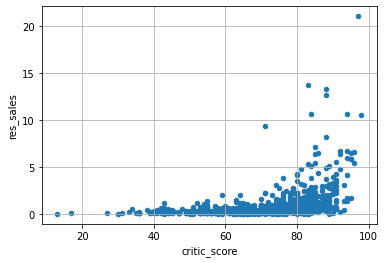

In [107]:
ps3.plot(x = 'critic_score', y='res_sales', kind='scatter', grid=True);

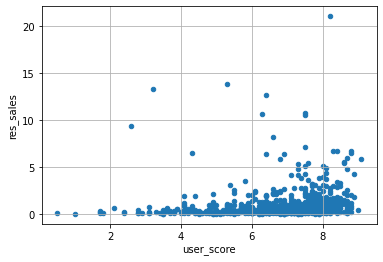

In [108]:
ps3.plot(x = 'user_score', y='res_sales', kind='scatter', grid=True);

In [109]:
ps3.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,res_sales
year_of_release,1.000000,-0.057800,0.016808,0.102977,-0.001280,0.003276,-0.047437,-0.007750
na_sales,-0.057800,1.000000,0.825403,0.375620,0.871465,0.450629,0.150631,0.940013
eu_sales,0.016808,0.825403,1.000000,0.417368,0.978001,0.378263,0.107035,0.961846
jp_sales,0.102977,0.375620,0.417368,1.000000,0.416060,0.194475,0.166781,0.491768
other_sales,-0.001280,0.871465,0.978001,0.416060,1.000000,0.390654,0.127973,0.975359
critic_score,0.003276,0.450629,0.378263,0.194475,0.390654,1.000000,0.631154,0.428213
user_score,-0.047437,0.150631,0.107035,0.166781,0.127973,0.631154,1.000000,0.143978
res_sales,-0.007750,0.940013,0.961846,0.491768,0.975359,0.428213,0.143978,1.000000


Зависимость между отзывами пользователей и продажами слабая, её почти нет. Зависимость между отзывами критиков и продажами слабая, её почти нет.

Рассмотрим платформу X360

In [110]:
x360 = years_box.query('platform == "X360" and user_score > 0 and critic_score > 0')
x360

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,res_sales
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
32,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M,14.62
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
...,...,...,...,...,...,...,...,...,...,...,...,...
15613,The Testament of Sherlock Holmes,X360,2012,Adventure,0.00,0.02,0.00,0.00,64.0,7.6,M,0.02
15625,Marvel Avengers: Battle for Earth,X360,2012,Action,0.02,0.00,0.00,0.00,62.0,7.3,T,0.02
15743,Worms,X360,2007,Strategy,0.00,0.02,0.00,0.00,75.0,6.9,E10+,0.02
16311,Banjo-Kazooie,X360,2008,Platform,0.00,0.01,0.00,0.00,77.0,8.2,E,0.01


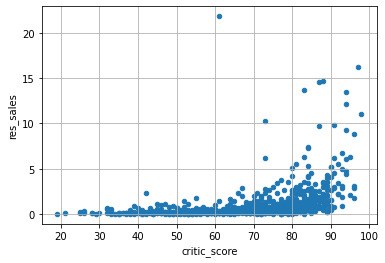

In [111]:
x360.plot(x = 'critic_score', y='res_sales', kind='scatter', grid=True);

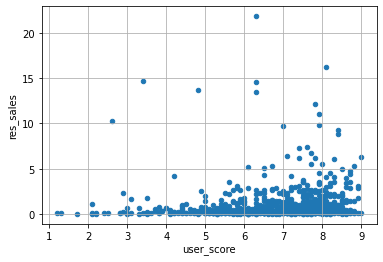

In [112]:
x360.plot(x = 'user_score', y='res_sales', kind='scatter', grid=True);

In [113]:
x360.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,res_sales
year_of_release,1.000000,0.036286,0.109241,-0.082736,0.047521,-0.010906,-0.162320,0.057813
na_sales,0.036286,1.000000,0.867076,0.516617,0.966921,0.373209,0.102680,0.986051
eu_sales,0.109241,0.867076,1.000000,0.496487,0.953073,0.380524,0.107795,0.937464
jp_sales,-0.082736,0.516617,0.496487,1.000000,0.535311,0.279094,0.172285,0.537560
other_sales,0.047521,0.966921,0.953073,0.535311,1.000000,0.397901,0.120049,0.992809
critic_score,-0.010906,0.373209,0.380524,0.279094,0.397901,1.000000,0.625020,0.388992
user_score,-0.162320,0.102680,0.107795,0.172285,0.120049,0.625020,1.000000,0.110280
res_sales,0.057813,0.986051,0.937464,0.537560,0.992809,0.388992,0.110280,1.000000


Зависимость между отзывами пользователей и продажами слабая, её почти нет. Зависимость между отзывами критиков и продажами слабая, её почти нет.

Вывод, на всех популярных платформах примерно одинаковая зависимость. Можно сделать вывод, что не зависимости между отзывами и продажами.

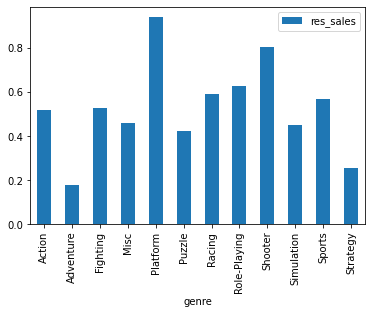

In [114]:
ye = years_box
ye.pivot_table(index='genre', values='res_sales').plot(kind='bar');

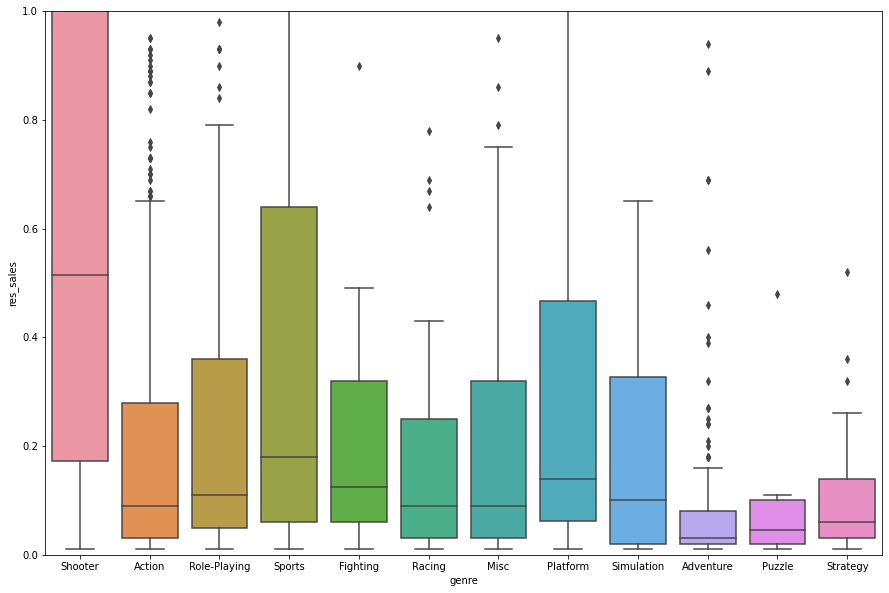

In [115]:
plt.figure(figsize=(15,10))
sns.boxplot(data=years, x='genre', y='res_sales').set(ylim=(0,1));

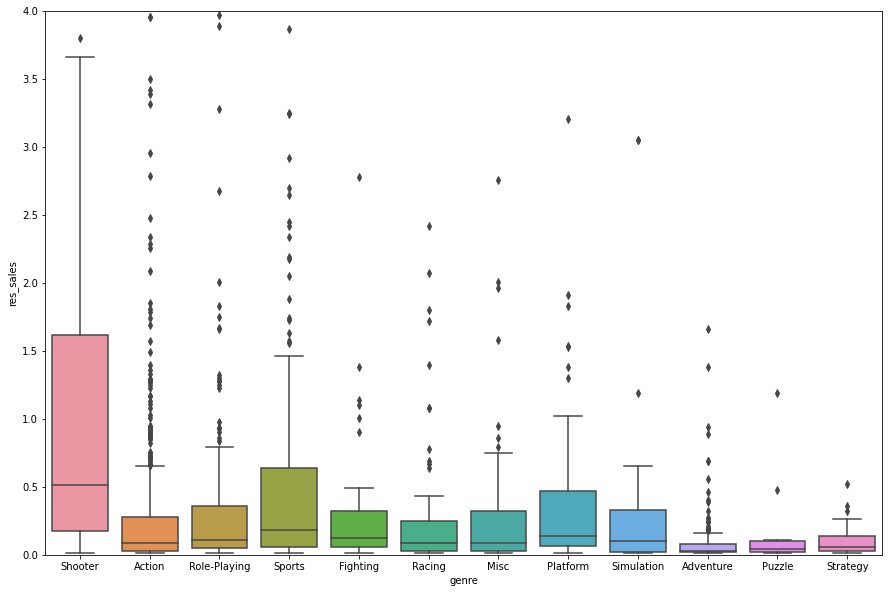

In [116]:
plt.figure(figsize=(15,10))
sns.boxplot(data=years, x='genre', y='res_sales').set(ylim=(0,4));

Самый прибыльный жанр shooter. Почти на одинакокм уровне идут жанры Sports, role-playing, platform, simulation, fighting, misc. Самый маленькой по прибыльности жанр adventure.

In [117]:
years.year_of_release.unique()

<IntegerArray>
[2015, 2014, 2016]
Length: 3, dtype: Int16

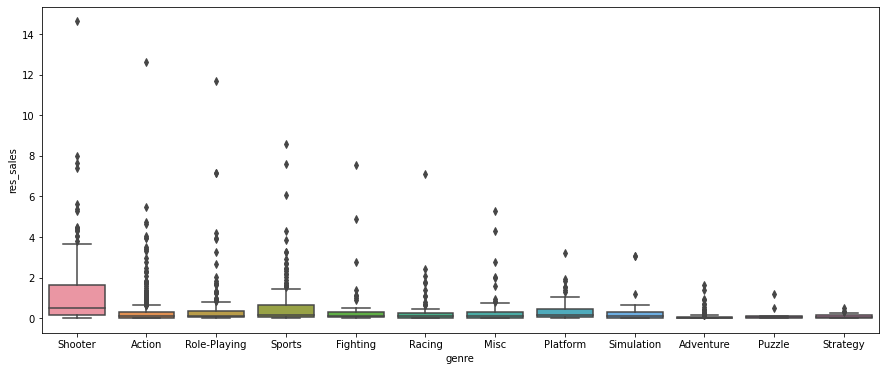

In [118]:
plt.figure(figsize=(15,6))
sns.boxplot(data=years, x='genre', y='res_sales');

## Составление портрета пользователя каждого региона

Разберу по отдельности каждый регион. Продажи в Северной Америке (na_sales), продажи в Европе (eu_sales), продажи в Японии (jp_sales).

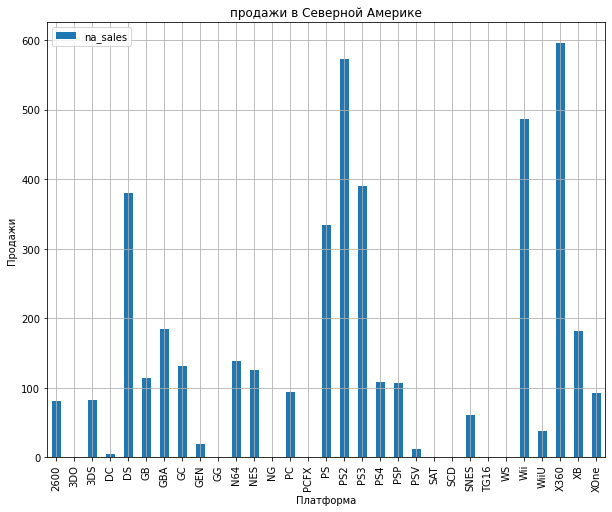

In [119]:
fig, ax = plt.subplots()
ye.pivot_table(index='platform', values='na_sales', aggfunc = 'sum').plot(ax = ax, kind='bar', grid=True, figsize=(10,8));
plt.title('продажи в Северной Америке')
ax.set_xlabel('Платформа')
ax.set_ylabel('Продажи');

Топ пять платформ в Америке - X360, PS2, Wii, PS3, DS

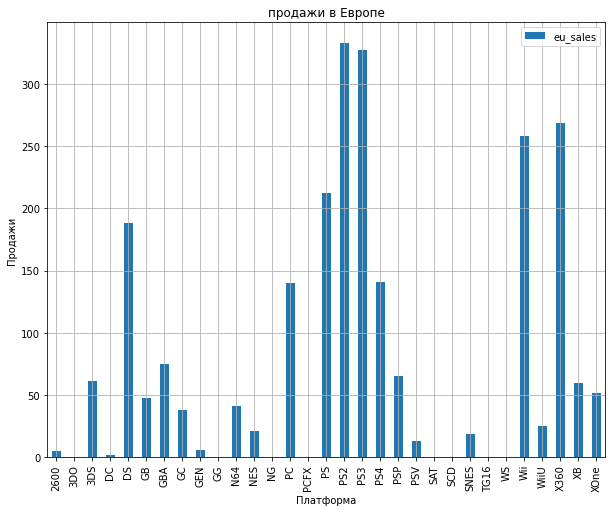

In [120]:
fig, ax = plt.subplots()
ye.pivot_table(index='platform', values='eu_sales', aggfunc = 'sum').plot(ax=ax, kind='bar', grid=True, figsize=(10,8));
plt.title('продажи в Европе')
ax.set_xlabel('Платформа')
ax.set_ylabel('Продажи');

Топ пять платформ в Европе - PS2, PS3, X360, Wii, DS

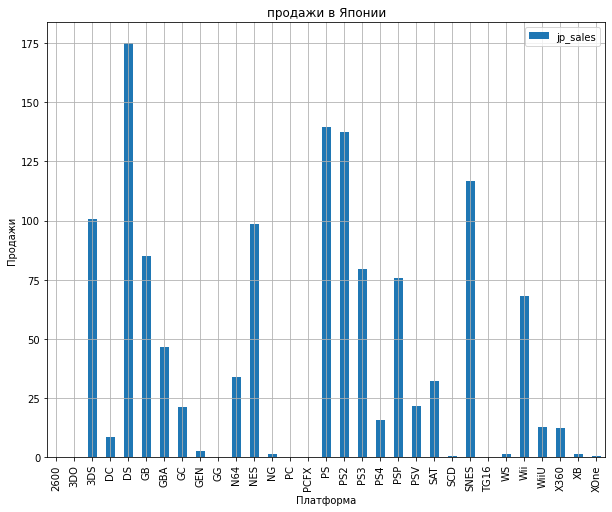

In [121]:
fig, ax = plt.subplots()
ye.pivot_table(index='platform', values='jp_sales', aggfunc = 'sum').plot(ax = ax, kind='bar', grid=True, figsize=(10,8));
plt.title('продажи в Японии')
ax.set_xlabel('Платформа')
ax.set_ylabel('Продажи');

Топ пять платформ в Японии - DS, PS2, 3DS, PS3, PSP

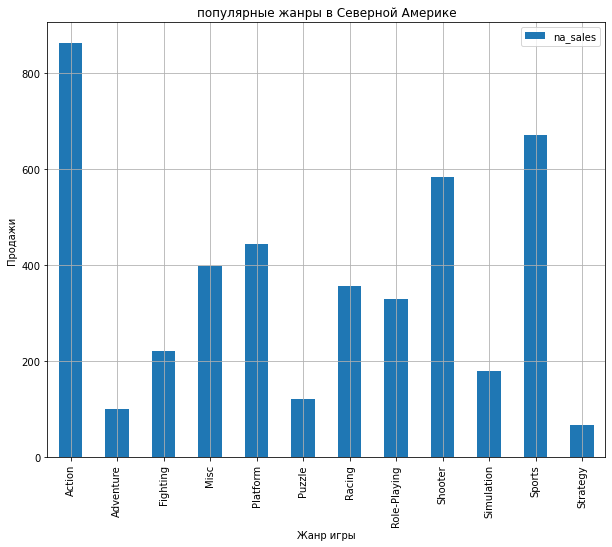

In [122]:
fig, ax = plt.subplots()
ye.pivot_table(index='genre', values='na_sales', aggfunc = 'sum').plot(ax = ax,kind='bar', grid=True, figsize=(10,8));
plt.title('популярные жанры в Северной Америке')
ax.set_xlabel('Жанр игры')
ax.set_ylabel('Продажи');

Топ 5 популярных жанров в Северной Америке - action, sports, shooter, misc, role-playing

популярные жанры в Европе


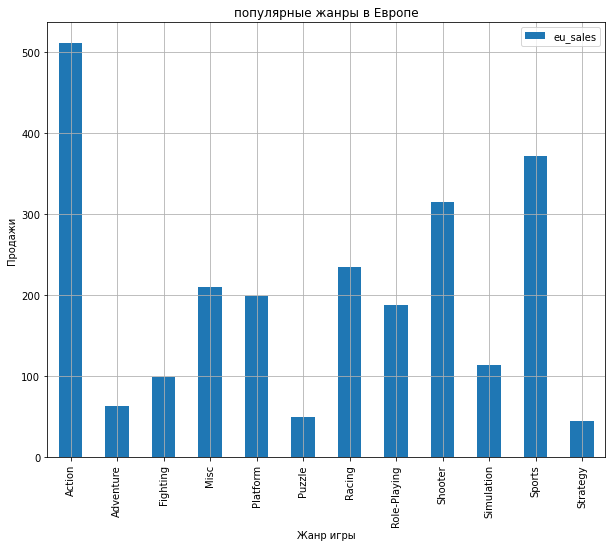

In [123]:
fig, ax = plt.subplots()
print('популярные жанры в Европе')
ye.pivot_table(index='genre', values='eu_sales', aggfunc = 'sum').plot(ax = ax, kind='bar', grid=True, figsize=(10,8));
plt.title('популярные жанры в Европе')
ax.set_xlabel('Жанр игры')
ax.set_ylabel('Продажи');

Топ 5 популярных жанров в Европе - action, sports, shooter, racing, misc

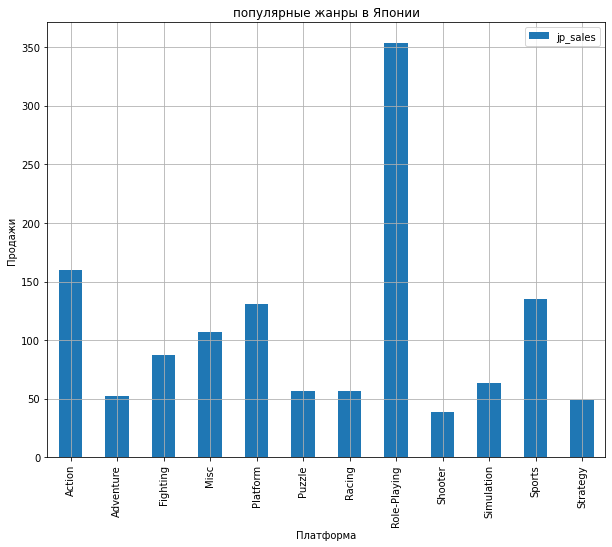

In [124]:
fig, ax = plt.subplots()
ye.pivot_table(index='genre', values='jp_sales', aggfunc = 'sum').plot(ax=ax, kind='bar', grid=True, figsize=(10,8));
plt.title('популярные жанры в Японии')
ax.set_xlabel('Платформа')
ax.set_ylabel('Продажи');

Топ 5 популярных жанров в Японии - role-playing, action, misc, sports,platform

Выводы, что очень похожи продажи по платформам и популярных жанрах похожи в Северной Америке и в Европе. Эти выводы сильно отличаются от выводов в Японии.

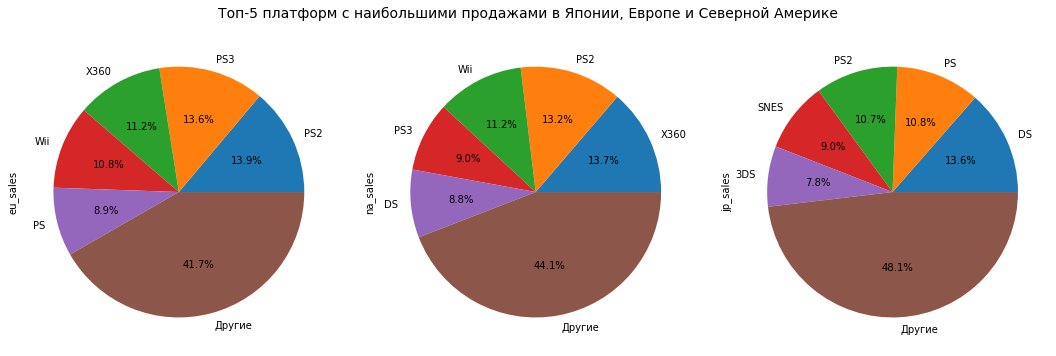

In [125]:
regions_sales = ['eu_sales', 'na_sales', 'jp_sales']

with plt.rc_context({'axes.edgecolor':'white', 'xtick.color':'white',\
                     'ytick.color':'white', 'figure.facecolor':'white'}):
    fig, ax = plt.subplots(1, len(regions_sales), figsize=(15,5))
    for i, region in enumerate(regions_sales):
        region_platform = ye.groupby('platform').agg({region: 'sum'})\
        .sort_values(by=region,ascending=False).reset_index()
        
        region_platform.loc[5] = ['Другие', region_platform.loc[5:][region].sum().round(2)]
        region_top_platform = region_platform.head(6)
        region_top_platform.plot(ax=ax[i], x='platform', y=region, kind='pie', \
                                 legend=False, autopct='%1.1f%%', labels=region_top_platform['platform'])
    plt.suptitle('Топ-5 платформ с наибольшими продажами в Японии, Европе и Северной Америке',fontsize=14)
    plt.tight_layout()
    plt.show()

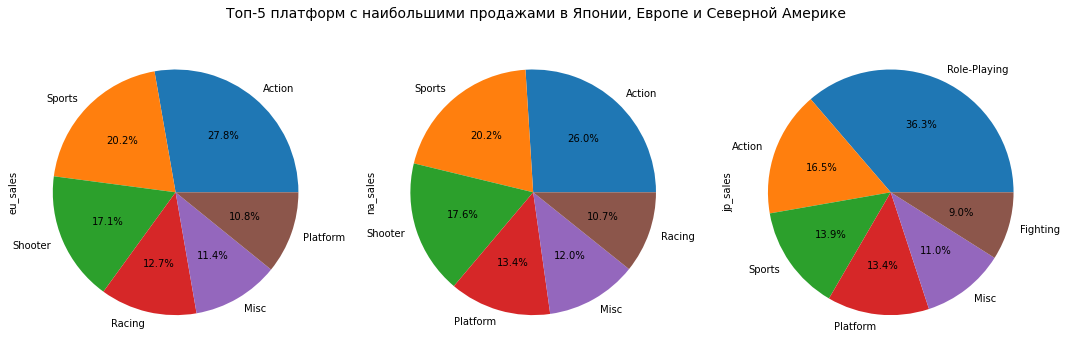

In [126]:
regions_sales = ['eu_sales', 'na_sales', 'jp_sales']

with plt.rc_context({'axes.edgecolor':'white', 'xtick.color':'white', \
                     'ytick.color':'white', 'figure.facecolor':'white'}):
    fig, ax = plt.subplots(1, len(regions_sales), figsize=(15,5))
    for i, region in enumerate(regions_sales):
        region_genre = ye.groupby('genre').agg({region: 'sum'}).sort_values(by=region,ascending=False).reset_index()
        region_top_genre = region_genre.head(6)
        region_top_genre.plot(ax=ax[i], x='genre', y=region,kind='pie', \
                              legend=False, autopct='%1.1f%%',labels=region_top_genre['genre'])
    plt.suptitle('Топ-5 платформ с наибольшими продажами в Японии, Европе и Северной Америке',fontsize=14)
    plt.tight_layout()
    plt.show()

Портрет пользователя за все годы: В Европе пользователь играет на других платформах(всех кроме представленных) или на платформе PS2 и в жанре action. В Северной Америке пользователь играет на других платформах (всех кроме представленных) или на X360 в жанре action. В Японии пользователь играет на других платформах(всех кроме представленных) или на DS в жанре Role-Playing.

Посмотрю, те же графики за актуальный период

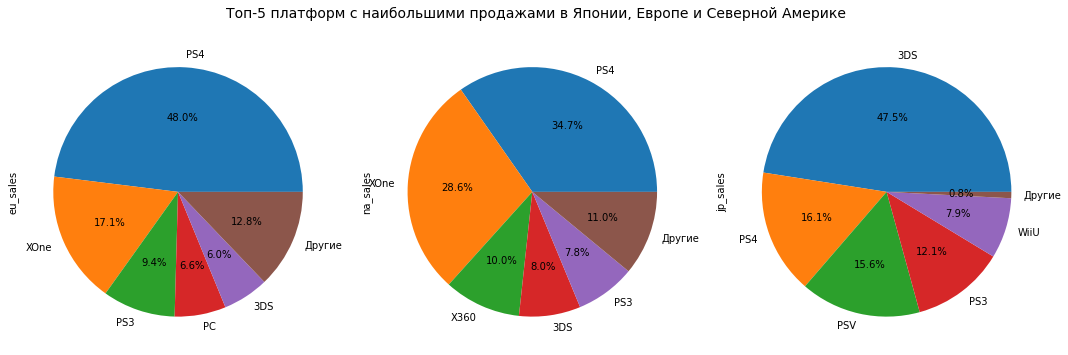

In [127]:
#для актуального периода
regions_sales = ['eu_sales', 'na_sales', 'jp_sales']

with plt.rc_context({'axes.edgecolor':'white', 'xtick.color':'white',\
                     'ytick.color':'white', 'figure.facecolor':'white'}):
    fig, ax = plt.subplots(1, len(regions_sales), figsize=(15,5))
    for i, region in enumerate(regions_sales):
        region_platform = years.groupby('platform').agg({region: 'sum'})\
        .sort_values(by=region,ascending=False).reset_index()
        
        region_platform.loc[5] = ['Другие', region_platform.loc[5:][region].sum().round(2)]
        region_top_platform = region_platform.head(6)
        region_top_platform.plot(ax=ax[i], x='platform', y=region, kind='pie', \
                                 legend=False, autopct='%1.1f%%', labels=region_top_platform['platform'])
    plt.suptitle('Топ-5 платформ с наибольшими продажами в Японии, Европе и Северной Америке',fontsize=14)
    plt.tight_layout()
    plt.show()

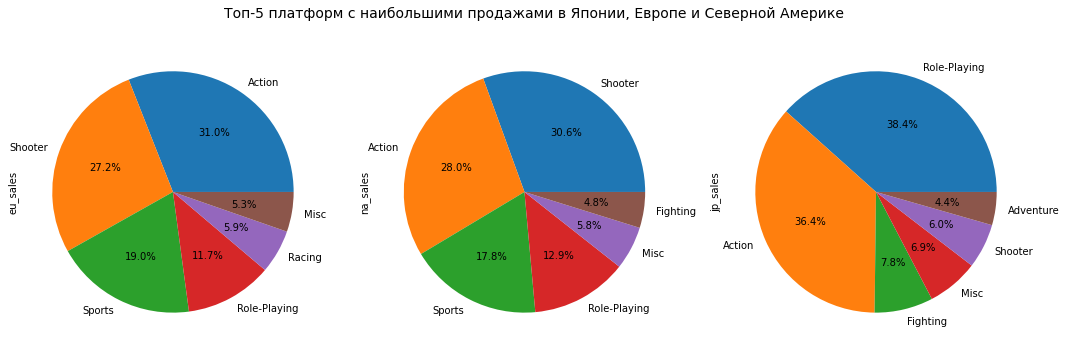

In [128]:
regions_sales = ['eu_sales', 'na_sales', 'jp_sales']

with plt.rc_context({'axes.edgecolor':'white', 'xtick.color':'white', \
                     'ytick.color':'white', 'figure.facecolor':'white'}):
    fig, ax = plt.subplots(1, len(regions_sales), figsize=(15,5))
    for i, region in enumerate(regions_sales):
        region_genre = years.groupby('genre').agg({region: 'sum'}).sort_values(by=region,ascending=False).reset_index()
        region_top_genre = region_genre.head(6)
        region_top_genre.plot(ax=ax[i], x='genre', y=region,kind='pie', \
                              legend=False, autopct='%1.1f%%',labels=region_top_genre['genre'])
    plt.suptitle('Топ-5 платформ с наибольшими продажами в Японии, Европе и Северной Америке',fontsize=14)
    plt.tight_layout()
    plt.show()

Портрет пользователя за актуальный период: В Европе пользователь играет на платформе PS4 и в жанре shooter. В Северной Америке пользователь играет на PS4 в жанре shooter. В Японии пользователь играет на платформе 3DS в жанре action.

Рейтинг за весь период

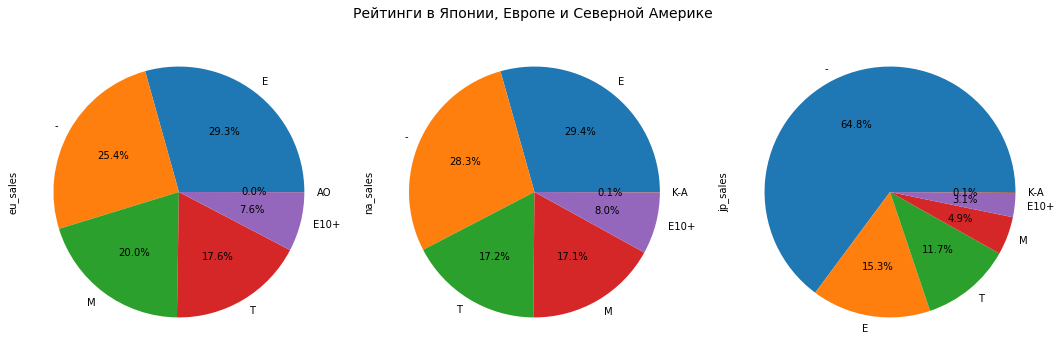

In [129]:
regions_sales = ['eu_sales', 'na_sales', 'jp_sales']

with plt.rc_context({'axes.edgecolor':'white', 'xtick.color':'white', 'ytick.color':'white', 'figure.facecolor':'white'}):
    fig, ax = plt.subplots(1, len(regions_sales), figsize=(15,5))
    for i, region in enumerate(regions_sales):
        region_rating = ye.groupby('rating').agg({region: 'sum'}).sort_values(by=region, ascending=False).reset_index()
        region_top_rating = region_rating.head(6)
        region_top_rating.plot(ax=ax[i], x='platform', y=region, kind='pie', legend=False, autopct='%1.1f%%', labels=region_top_rating['rating'])
    plt.suptitle('Рейтинги в Японии, Европе и Северной Америке',fontsize=14)
    plt.tight_layout()
    plt.show()

В Европе и Северной Америке примерно одинаковое количество процентов остаются без рейтинга. В Японии большинство игр (больше 60%) без рейтинга. В Европе большая часть оценивается Е, как и в Северной Америке. На втором месте и в Японии оценка Е.

Рейтинг за актуальный период

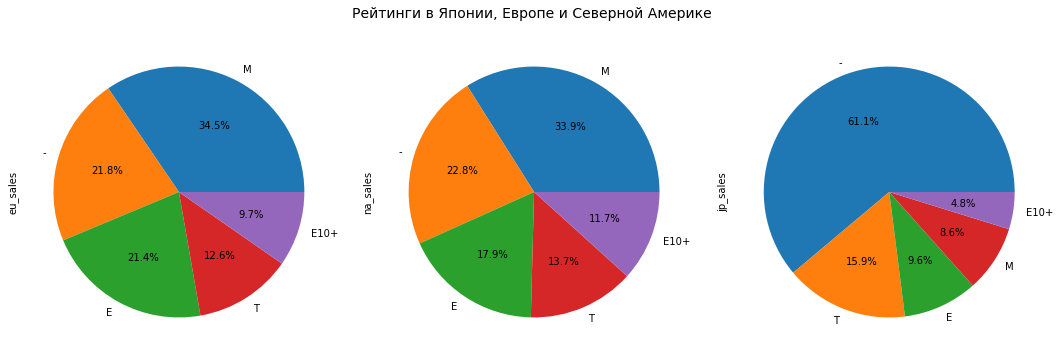

In [130]:
regions_sales = ['eu_sales', 'na_sales', 'jp_sales']

with plt.rc_context({'axes.edgecolor':'white', 'xtick.color':'white', 'ytick.color':'white', 'figure.facecolor':'white'}):
    fig, ax = plt.subplots(1, len(regions_sales), figsize=(15,5))
    for i, region in enumerate(regions_sales):
        region_rating = years.groupby('rating').agg({region: 'sum'}).sort_values(by=region, ascending=False).reset_index()
        region_top_rating = region_rating.head(6)
        region_top_rating.plot(ax=ax[i], x='platform', y=region, kind='pie', legend=False, autopct='%1.1f%%', labels=region_top_rating['rating'])
    plt.suptitle('Рейтинги в Японии, Европе и Северной Америке',fontsize=14)
    plt.tight_layout()
    plt.show()

В Европе и Северной Америке примерно одинаковое количество процентов оценки M. В Японии большинство процентов без оценки, второе место это оценка T.

## Проверка гипотез

Гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. 

За нулевую гипотезу возьмем когда рейтинги даннных платформ одинаковые. 

За альтернативную гипотезу возьмем, что средние пользовательски рейтинги платформ Xbox One и PC разные.

In [131]:
xone = ye[ye['platform'] == 'XOne']
pc = ye[ye['platform'] == 'PC']
print('Год выхода платформы XOne',min(xone['year_of_release']))
print('Год выхода платформы PC',min(pc['year_of_release']))
pc = pc[pc['year_of_release'] >= 2013]
print('Год выхода платформы PC',min(pc['year_of_release'])) # проверка, что поменяли
xone = xone[xone['user_score'] > 0]
pc = pc[pc['user_score'] > 0]

Год выхода платформы XOne 2013
Год выхода платформы PC 1985
Год выхода платформы PC 2013


возьмем данные с 2013 года, когда вышла платформа XOne.

In [132]:
arr1 = xone['user_score']
arr2 = pc['user_score']
alpha=0.05
results = st.ttest_ind(arr1,arr2, equal_var=False)
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-value: 0.14759594013430463
Не отвергаем нулевую гипотезу


Полученное значение p-value говорит о том, что хотя средние пользовательские рейтинги платформ Xbox One и PC с вероятностью в почти 14% такое или большее различие можно получить случайно. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними чеками.

На уровне значимости 5% (уровне доверия 95%) нет оснований отвергнуть нулевую гипотезу в пользу альтернативы.

Гипотеза: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны. 

За нулевую гипотезу возьмем, когда средние пользовательские рейтинги жанров action и sports равны.

За альтернативную гипотезу возьмем, что эти рейтинги разные.

In [135]:
action = ye.query('genre == "Action" and user_score > 0')
sports = ye.query('genre == "Sports" and user_score > 0')

In [136]:
arr1 = action['user_score']
arr2 = sports['user_score']
alpha=0.05
results = st.ttest_ind(arr1,arr2, equal_var = False)
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-value: 0.07370217419278534
Не отвергаем нулевую гипотезу


На уровне значимости 5% (уровне доверия 95%) нет оснований отвергнуть нулевую гипотезу в пользу альтернативы.

## Шаг. Общий вывод

Сначала я подготовила данные для проведения дальнейшего исследования:
- При подготовке данных я привела названия столбцов к нижнему регистру, для того чтобы было их удобней в дальнейшем использовать и не ошибиться.
- Обрабатала пропуски 
        - во-первых, убираю пропуски в столбце с названиями игр, так как они реально бесполезны, 
        - во-вторых, пропуски в последующих столбцах связанны либо с человеческим фактором, либо с компьютерным сбоем. Их заполняю значением (-1), чтобы не исказились данные.
        - Также некоторые столбцы привела к другому типам данных. 
   
   
На шаге исследовательского анализа я выявила некоторые зависимости. 
- В дальнейших зависимостях я приняла за актуальный период с 2014 года по 2016, так как до этого игр было слишком мало. 
- Самая популярная платформа PS4. 
- Дальше я выявила портрет пользователя для каждого региона. 
     - Портрет пользователя за все годы: 
         - В Европе пользователь играет на других платформах(всех кроме представленных) или на платформе PS2 и в жанре action. 
         - В Северной Америке пользователь играет на других платформах (всех кроме представленных) или на X360 в жанре action. 
         - В Японии пользователь играет на других платформах(всех кроме представленных) или на DS в жанре Role-Playing. 
      - Портрет пользователя за актуальный период: 
         - В Европе пользователь играет на платформе PS4 и в жанре shooter.
         - В Северной Америке пользователь играет на PS4 в жанре shooter. 
         - В Японии пользователь играет на платформе 3DS в жанре action.

Проверка гипотез: На уровне значимости 5% (уровне доверия 95%) нет оснований отвергнуть нулевые гипотезы в пользу альтернативы.

Формулирую их: 
- 1) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. 
- 2) Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.